# `gtab` example usage
When querying Google Trends, it outputs scores as integers in the range $[0, 100]$.
For example, when we query Facebook (/m/02y1vz), Twitter (/m/0289n8t), and EPFL (/m/0jg7r, a swiss university) we get the following:

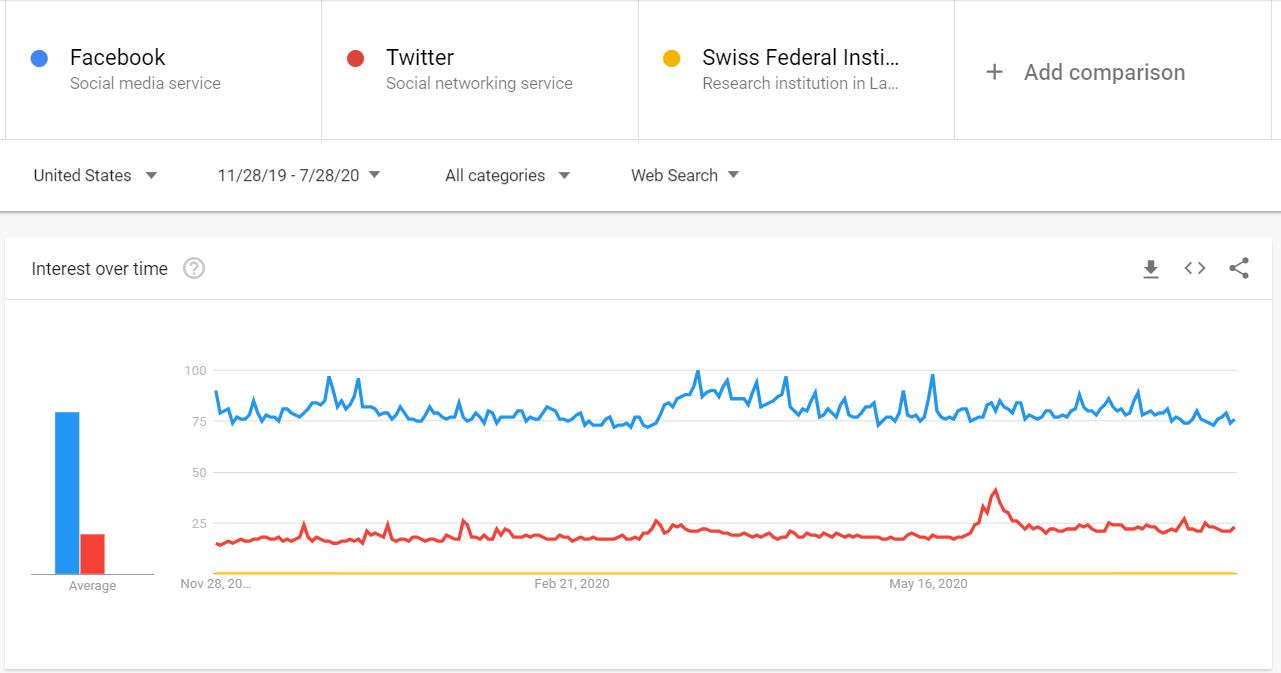

In [1]:
from IPython.display import display, Image
display(Image(filename='./imgs/fb_tw_ep.png'))

We have two problems here:

1. EPFL is always listed as  $<1\%$, so it does not convey any information to us!

2. GTrends limits us to 5 keywords! Would not work if we wanted to compare dozens or hundreds of keywords?

To solve both of these issues we can use the `gtab`! 

## 1: Setting it up!
We need to create a `GTAB` object with the desired path. This will create and initialize the directory structure of `my_path` if it does not exist. If it does, it assumes we have already set up that directory for use!

In [2]:
import gtab
my_path = "example_path"
t = gtab.GTAB(dir_path=my_path)

Using directory 'example_path'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv



There are two default anchor banks included in the package. To list them use:

In [3]:
t.list_gtabs()

Existing GTABs:
	google_anchorbank_geo=AR_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=AU_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=BA_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=BO_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=BR_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=CA_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=CN_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=CO_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=DE_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=DK_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=EC_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=ES_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=FR_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=GB_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=GH_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=GR_timeframe=2019-01-01 2020-12

`google_anchorbank_geo=_` is the global anchor bank. 

In this example we will continue to use it, but you could change to another anchor bank, for example the Italian one by using:

In [5]:
t.set_active_gtab("google_anchorbank_geo=IT_timeframe=2019-01-01 2020-12-31.tsv")

Active anchorbank changed to: google_anchorbank_geo=IT_timeframe=2019-01-01 2020-12-31.tsv



This reverts to the global anchor bank:

In [7]:
t.set_active_gtab("google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv")

Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv



## 2: Making a query! 
Now we can request a new query and calibrate it using our selected anchor bank! 

The `new_query` method will output a dataframe containing, as index the dates, and as columns the estimated value `max_ratio`, and a error interval related to our method `max_ratio_hi` and `max_ratio_lo`.

In [8]:
mid = "/m/0jg7r" # freebase code for EPFL
nq_res= t.new_query(mid) 
nq_res

Using example_path\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query '/m/0jg7r'
New query calibrated!


max_ratio  max_ratio_hi  max_ratio_lo
time [UTC]                                       
2018-12-30       0.24         0.245         0.235
2019-01-06       0.40         0.405         0.395
2019-01-13       0.41         0.415         0.405
2019-01-20       0.40         0.405         0.395
2019-01-27       0.38         0.385         0.375
...               ...           ...           ...
2020-06-28       0.31         0.315         0.305
2020-07-05       0.28         0.285         0.275
2020-07-12       0.29         0.295         0.285
2020-07-19       0.28         0.285         0.275
2020-07-26       0.27         0.275         0.265

[83 rows x 3 columns]

## 3: Creating your own anchor bank

In [9]:
my_path = "example_path"
t = gtab.GTAB(dir_path=my_path)

Directory already exists, loading data from it.
Using directory 'example_path'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv



For example, if we want to construct an anchorbank with data from Germany between March 5th 2020 and May 5th 2020, we set:


In [10]:
t.set_options(pytrends_config={"geo": "", "timeframe": "2004-01-01 2025-01-01"})

And then run the construction! Which can take a while!

In [ ]:
t.create_anchorbank() # takes a while to run since it queries Google Trends.

Now we have another available anchor bank:

In [12]:
t.list_gtabs()

Existing GTABs:
	google_anchorbank_geo=AR_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=AU_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=BA_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=BO_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=BR_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=CA_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=CN_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=CO_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=DE_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=DK_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=EC_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=ES_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=FR_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=GB_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=GH_timeframe=2019-01-01 2020-12-31.tsv
	google_anchorbank_geo=GR_timeframe=2019-01-01 2020-12

We can set it as default and make new queries, now in this new location/timeframe!

In [15]:
t.set_active_gtab("google_anchorbank_geo=_timeframe=2004-01-01 2025-01-01.tsv")
mid = "/m/0jg7r" # freebase code for EPFL
nq_res = t.new_query(mid) 
nq_res

Active anchorbank changed to: google_anchorbank_geo=_timeframe=2004-01-01 2025-01-01.tsv

Using example_path\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2004-01-01 2025-01-01.tsv
New query '/m/0jg7r'
New query calibrated!


max_ratio  max_ratio_hi  max_ratio_lo
time [UTC]                                       
2004-01-01       0.81         0.815         0.805
2004-02-01       0.67         0.675         0.665
2004-03-01       0.81         0.815         0.805
2004-04-01       0.71         0.715         0.705
2004-05-01       0.72         0.725         0.715
...               ...           ...           ...
2024-09-01       0.36         0.365         0.355
2024-10-01       0.29         0.295         0.285
2024-11-01       0.33         0.335         0.325
2024-12-01       0.28         0.285         0.275
2025-01-01       0.32         0.325         0.315

[253 rows x 3 columns]

---

Active anchorbank changed to: google_anchorbank_geo=_timeframe=2004-01-01 2025-01-01.tsv

Using example_path\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2004-01-01 2025-01-01.tsv
New query 'new'
New query calibrated!
Using example_path\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2004-01-01 2025-01-01.tsv
New query 'novel'
New query calibrated!


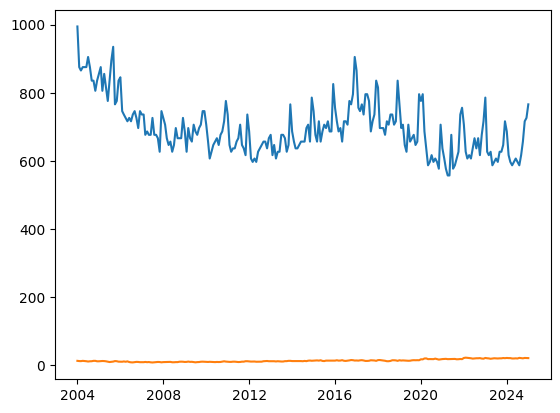

In [16]:
import matplotlib.pyplot as plt 
t.set_active_gtab("google_anchorbank_geo=_timeframe=2004-01-01 2025-01-01.tsv")
query_new = t.new_query("new")
query_novel = t.new_query("novel")

plt.plot(query_new.max_ratio)
plt.plot(query_novel.max_ratio)
# lots of plotting code omitted here :)
plt.show()

In [22]:
t.new_query("\"a latere\"")

Using example_path\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2004-01-01 2025-01-01.tsv
New query '"a latere"'


KeyError: '"a latere"'